## Problem Statement

Predicting Coupon Redemption

XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?
 

Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.
 

ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.
 

The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

    User Demographic Details
    Campaign and coupon Details
    Product details
    Previous transactions

Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?



 
## Dataset Description
Here is the schema for the different data tables available. The detailed data dictionary is provided next.

 

You are provided with the following files in train.zip:

train.csv: Train data containing the coupons offered to the given customers under the 18 campaigns
Variable 	Definition
id 	Unique id for coupon customer impression
campaign_id 	Unique id for a discount campaign
coupon_id 	Unique id for a discount coupon
customer_id 	Unique id for a customer
redemption_status 	(target) (0 - Coupon not redeemed, 1 - Coupon redeemed)
 

campaign_data.csv: Campaign information for each of the 28 campaigns
Variable 	Definition
campaign_id 	Unique id for a discount campaign
campaign_type 	Anonymised Campaign Type (X/Y)
start_date 	Campaign Start Date
end_date 	Campaign End Date
 

coupon_item_mapping.csv: Mapping of coupon and items valid for discount under that coupon
Variable 	Definition
coupon_id 	Unique id for a discount coupon (no order)
item_id 	Unique id for items for which given coupon is valid (no order)
 

customer_demographics.csv: Customer demographic information for some customers
Variable 	Definition
customer_id 	Unique id for a customer
age_range 	Age range of customer family in years
marital_status 	Married/Single
rented 	0 - not rented accommodation, 1 - rented accommodation
family_size 	Number of family members
no_of_children 	Number of children in the family
income_bracket 	Label Encoded Income Bracket (Higher income corresponds to higher number)
 

customer_transaction_data.csv: Transaction data for all customers for duration of campaigns in the train data
Variable 	Definition
date 	Date of Transaction
customer_id 	Unique id for a customer
item_id 	Unique id for item
quantity 	quantity of item bought
selling_price 	Sales value of the transaction
other_discount 	Discount from other sources such as manufacturer coupon/loyalty card
coupon_discount 	Discount availed from retailer coupon
 

item_data.csv: Item information for each item sold by the retailer
Variable 	Definition
item_id 	Unique id for item
brand 	Unique id for item brand
brand_type 	Brand Type (local/Established)
category 	Item Category
 

test.csv: Contains the coupon customer combination for which redemption status is to be predicted
Variable 	Definition
id 	Unique id for coupon customer impression
campaign_id 	Unique id for a discount campaign
coupon_id 	Unique id for a discount coupon
customer_id 	Unique id for a customer
 

*Campaign, coupon and customer data for test set is also contained in train.zip 

sample_submission.csv: This file contains the format in which you have to submit your predictions.

To summarise the entire process:

    Customers receive coupons under various campaigns and may choose to redeem it.
    They can redeem the given coupon for any valid product for that coupon as per coupon item mapping within the duration between campaign start date and end date
    Next, the customer will redeem the coupon for an item at the retailer store and that will reflect in the transaction table in the column coupon_discount

#### Importing Libraries  

In [1]:
import pandas as pd 
import numpy as np
from PIL import Image


#### Reading the Schema to understand the data link

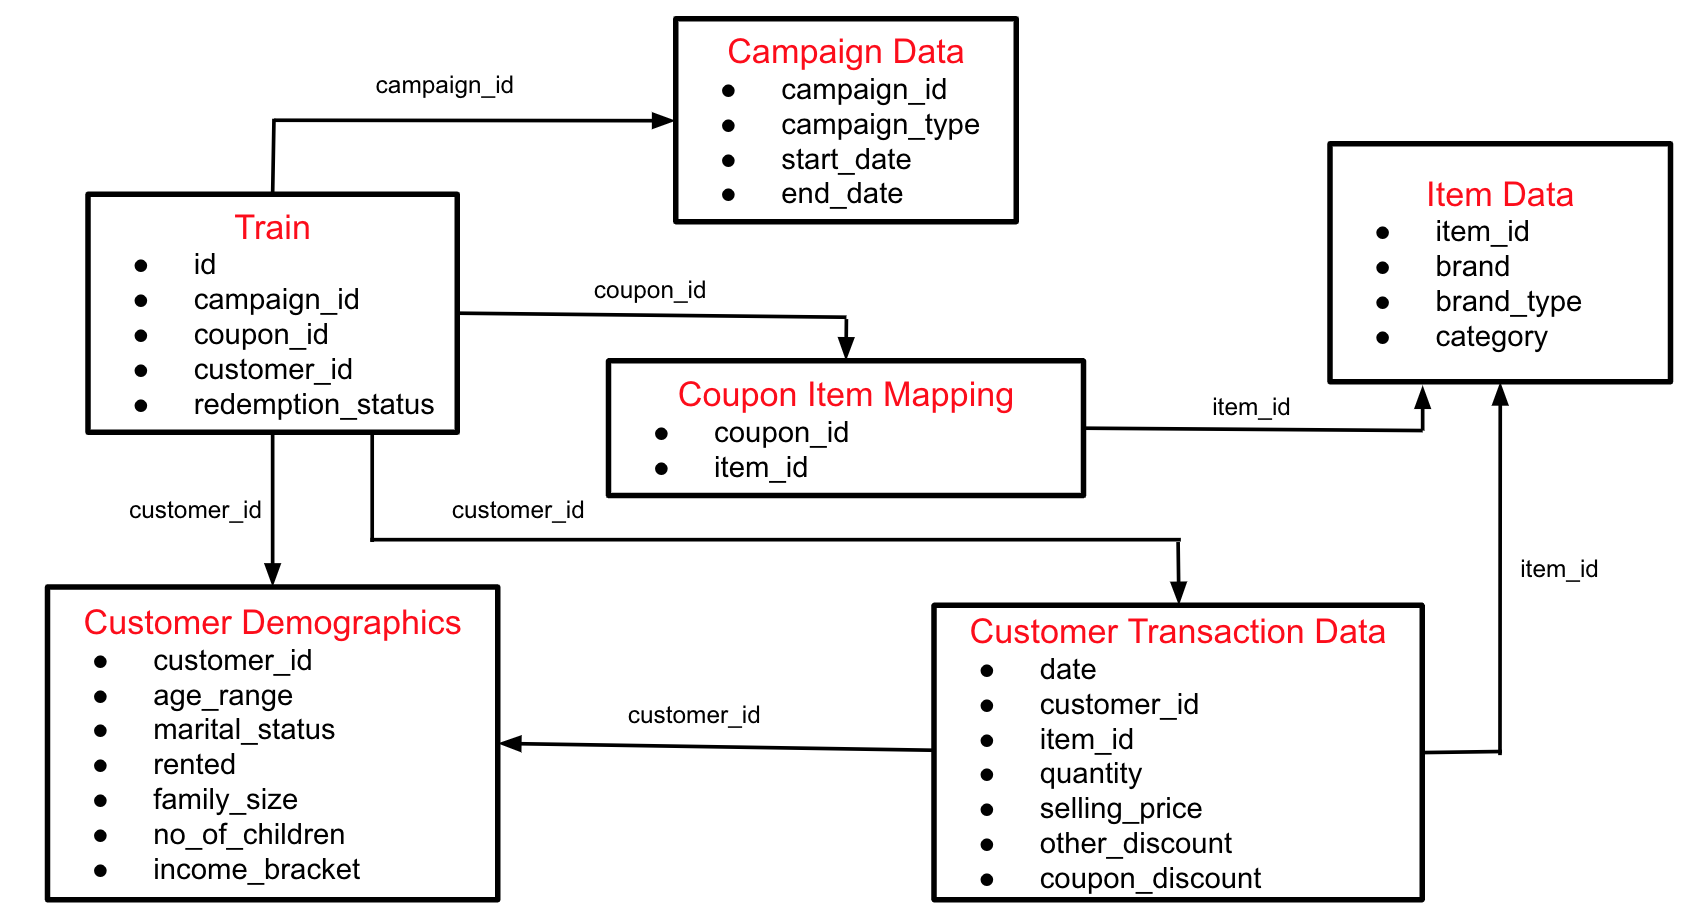

In [2]:
read_image=Image.open('/home/gaurav/Downloads/AmExpert/Image.png')
read_image

#### Reading the train dataset 

In [3]:
train=pd.read_csv('/home/gaurav/Downloads/AmExpert/train.csv')
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


#### Finding any null value present in the dataset

In [4]:
train.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

#### Finding correlation between features

In [5]:
train.corr()

,id,campaign_id,coupon_id,customer_id,redemption_status
id,1.000000,0.006443,-0.001067,-0.000088,-0.000328
campaign_id,0.006443,1.000000,0.102046,-0.003556,-0.007548
coupon_id,-0.001067,0.102046,1.000000,0.007551,0.023334
customer_id,-0.000088,-0.003556,0.007551,1.000000,0.011690
redemption_status,-0.000328,-0.007548,0.023334,0.011690,1.000000


#### from seaborn library checking the correlation of feature through heatmap

In [6]:
import seaborn as sns

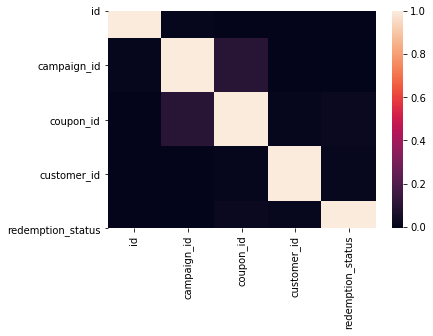

In [7]:
sns.heatmap(train.corr())

#### checking the unique campaign_id present in the dataset

In [8]:
train['campaign_id'].unique(),train['redemption_status'].unique()

(array([13,  9,  8, 11, 29, 30,  2,  5, 12, 26,  3,  4, 10,  7, 28, 27,  6,
         1]), array([0, 1]))

In [ ]:
#### 

In [9]:
train=train.drop('customer_id',axis=1)

In [10]:
train.head()

,id,campaign_id,coupon_id,redemption_status
0,1,13,27,0
1,2,13,116,0
2,6,9,635,0
3,7,13,644,0
4,9,8,1017,0


In [11]:
x=train.iloc[:,:-1].values
x.shape

(78369, 3)

In [12]:
y=train.iloc[:,-1].values
y.shape

(78369,)

#### Using Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.640891)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28143, 3), (50226, 3), (28143,), (50226,))

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR=LogisticRegression()

In [18]:
LR.fit(x,y)

/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
LR_pred_y=LR.predict(x_test)

In [20]:
LR_pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
LR_cm=confusion_matrix(y_test,LR_pred_y)
LR_cm

array([[49754,     0],
       [  472,     0]])

In [23]:
LR_score=accuracy_score(y_test,LR_pred_y)
LR_score*100

99.06024768048421

#### Using XGBoost

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb=XGBClassifier()

In [26]:
xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [27]:
xgb_pred_y=xgb.predict(x_test)

In [28]:
xgb_pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
xgb_cm=confusion_matrix(y_test,xgb_pred_y)
xgb_cm

array([[49754,     0],
       [  472,     0]])

In [30]:
xgb_score=accuracy_score(y_test,xgb_pred_y)
xgb_score*100

99.06024768048421

In [31]:
LR_score,xgb_score

(0.9906024768048421, 0.9906024768048421)

In [32]:
df=pd.read_csv('/home/gaurav/Downloads/AmExpert/test_QyjYwdj.csv')
df.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [33]:
df=df.drop('customer_id',axis=1)

In [34]:
df.head()

,id,campaign_id,coupon_id
0,3,22,869
1,4,20,389
2,5,22,981
3,8,25,1069
4,10,17,498


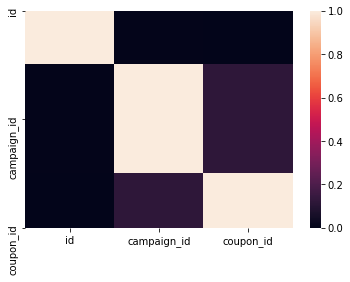

In [35]:
sns.heatmap(df.corr())

In [36]:
x1=df.iloc[:,:].values
x1.shape

(50226, 3)

In [37]:
LR_pred_y_x1=LR.predict(x1)

In [38]:
LR_pred_y_x1

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
LR_cm_x1=confusion_matrix(y_test,LR_pred_y_x1)
LR_cm_x1

array([[49754,     0],
       [  472,     0]])

In [40]:
LR_score_x1=accuracy_score(y_test,LR_pred_y_x1)
LR_score_x1

0.9906024768048421

In [41]:
xgb_pred_y_x1=xgb.predict(x1)
xgb_pred_y_x1

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
xgb_cm_x1=confusion_matrix(y_test,LR_pred_y_x1)
xgb_cm_x1

array([[49754,     0],
       [  472,     0]])

In [43]:
xgb_score_x1=accuracy_score(y_test,LR_pred_y_x1)
xgb_score_x1

0.9906024768048421

In [77]:
data=df['id']
data

0             3
1             4
2             5
3             8
4            10
          ...  
50221    128584
50222    128588
50223    128591
50224    128593
50225    128594
Name: id, Length: 50226, dtype: int64

In [74]:
data1=np.array(xgb_pred_y_x1)
print(data1)

[0 0 0 ... 0 0 0]


In [81]:
data1[:]

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
dataset = pd.DataFrame({'id': data, 'redemption_status': data1})

In [89]:
dataset.head()

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0


In [91]:
dataset.to_csv('/home/gaurav/Desktop/Submission_Kumar_Gaurav.csv')